# predicting heart disease classificatier 


In [2]:
# import tools we need for exploring data 
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import tools we need for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier    

In [4]:
# import tools we need for evaluataion

In [5]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV

### features describtion 

id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

### load data

In [6]:
df = pd.read_csv('heart-disease.csv')

In [7]:
df.shape

(303, 14)

### data exploring

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.target.value_counts()
## according to targets it is balanced classification 

1    165
0    138
Name: target, dtype: int64

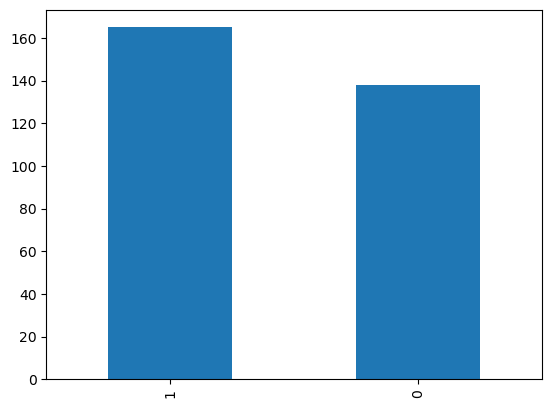

In [12]:
df.target.value_counts().plot(kind='bar');


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### compare sex & target

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

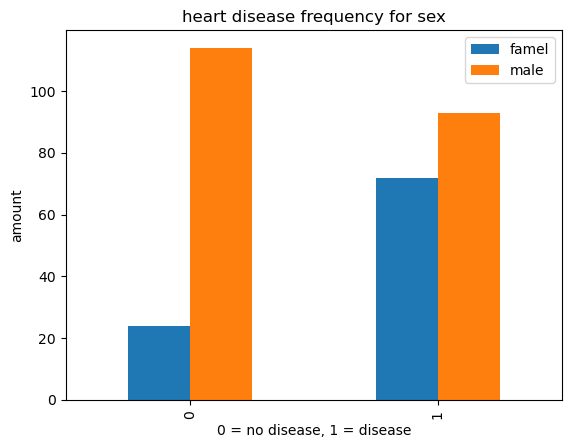

In [16]:
pd.crosstab(df.target, df.sex).plot(kind="bar")

plt.title('heart disease frequency for sex')
plt.xlabel('0 = no disease, 1 = disease')
plt.ylabel('amount')
plt.legend(['famel', 'male']);

### compare thalach(max heart rate) & age for target 

In [17]:
df.thalach.value_counts()

## according leanght of thalach we don't use plot_bar and use scatter

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Text(0, 0.5, 'thalach')

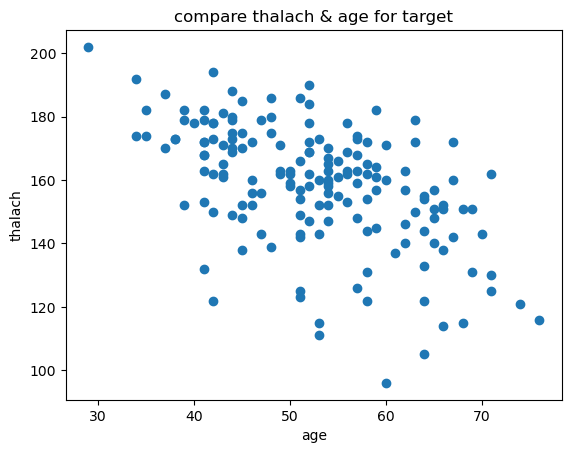

In [18]:
plt.figure()
plt.scatter(df.age[df.target==1],
           (df.thalach[df.target==1]))

plt.title('compare thalach & age for target')
plt.xlabel('age')
plt.ylabel('thalach')

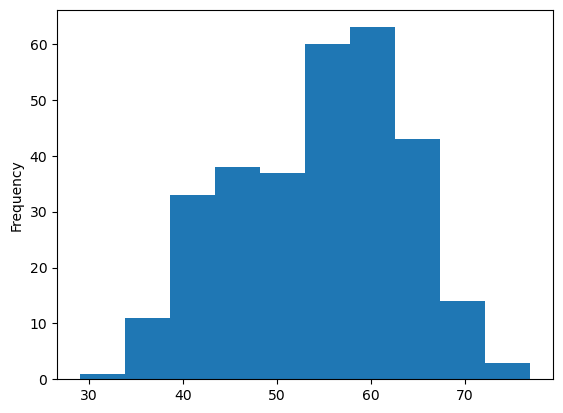

In [19]:
df.age.plot.hist();

## hist is a way for checking distributon,
## for the distribution of the age is normal


### compare chest pain with target

In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


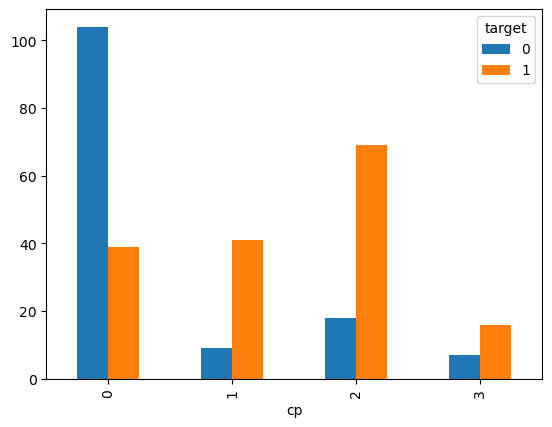

In [22]:
pd.crosstab(df.cp, df.target).plot(kind='bar');

### correlation matrix

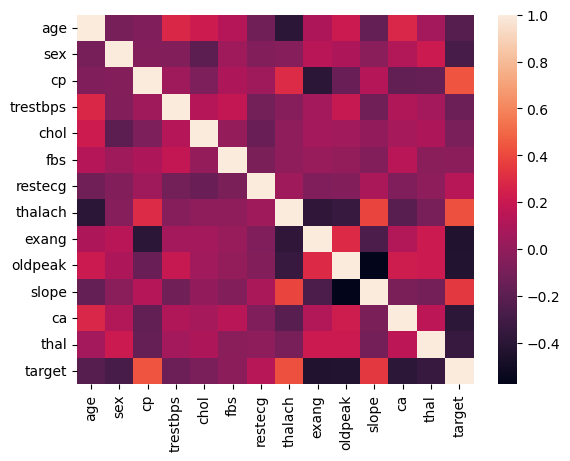

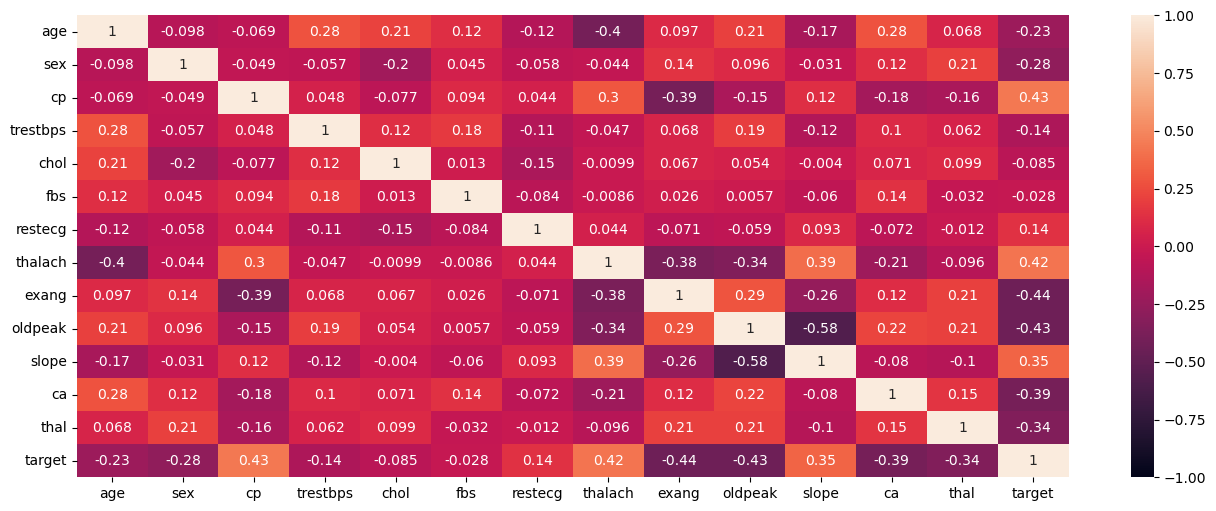

In [23]:
corr_matrix = df.corr()
ax = sns.heatmap(corr_matrix)
plt.figure(figsize=(16, 6));
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True);



## modeling

In [24]:
x = df.drop('target', axis=1)

In [25]:
y= df.target

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [27]:
models={ 
    'lr' : LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'rfc' :RandomForestClassifier()
}


In [28]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return  model_scores  

In [29]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [30]:
model_scores

{'lr': 0.8688524590163934,
 'knn': 0.6721311475409836,
 'rfc': 0.8524590163934426}

<AxesSubplot:>

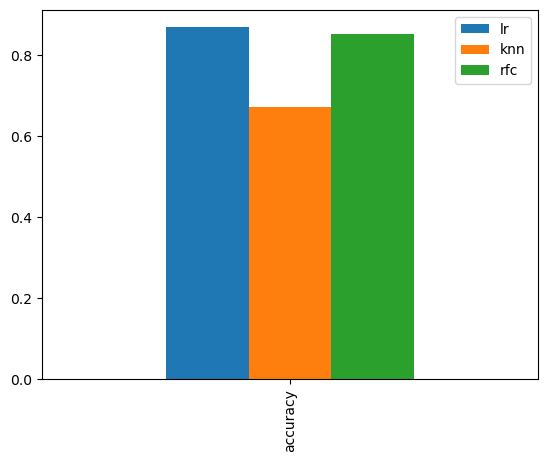

In [31]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot(kind='bar')                            

### hyperprameter tunning

In [32]:
## knn hyperprameter tunning (handy): we can change range of n_neighbrs

train_score =[]
test_score =[]

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors :
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))


/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [33]:
train_score

[1.0,
 0.8099173553719008,
 0.768595041322314,
 0.768595041322314,
 0.7727272727272727,
 0.756198347107438,
 0.7479338842975206,
 0.7272727272727273,
 0.7107438016528925,
 0.6900826446280992,
 0.7024793388429752,
 0.6818181818181818,
 0.6942148760330579,
 0.6776859504132231,
 0.6900826446280992,
 0.6983471074380165,
 0.6900826446280992,
 0.6900826446280992,
 0.6942148760330579,
 0.6983471074380165]

In [34]:
 test_score

[0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6229508196721312,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361]

Text(0, 0.5, 'score')

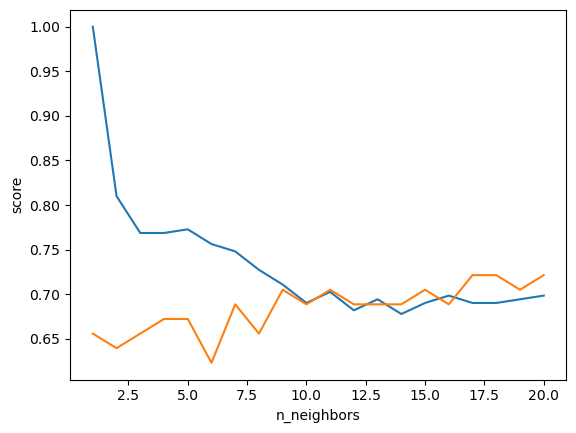

In [35]:
plt.plot(neighbors, train_score, label='train')
plt.plot(neighbors, test_score, label='test')
plt.xlabel('n_neighbors')
plt.ylabel('score')




In [36]:
## randomforestclassifier & logsticregression hyperprameter tunnig : randomizedsearchcv

grid_lr = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear'] }

grid_rfc = {'n_estimators': np.arange(10, 1000, 50),
            'max_depth':[None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}

In [37]:
cv_lr =  RandomizedSearchCV(LogisticRegression(),
                           param_distributions=grid_lr,
                           cv=5,
                           n_iter=20,
                           verbose=True)



In [38]:
cv_lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
cv_lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [40]:
cv_lr.score(x_test, y_test)

0.8688524590163934

In [41]:
np.random.seed(42)
cv_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=grid_rfc,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [42]:
cv_rfc.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
cv_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
cv_rfc.score(x_test, y_test)

0.8524590163934426

In [49]:
## logesticregressin hyperprmeter tunnig with gridsearchcv

grid_lr_2 = {'C': np.logspace(-4, 4, 30),
           'solver': ['liblinear'] }

cv_lr_2 = GridSearchCV(LogisticRegression(),
                           param_grid=grid_lr_2,
                           cv=5,
                           verbose=True)

cv_lr_2.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
cv_lr_2.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [51]:
cv_lr_2.score(x_test, y_test)

0.8524590163934426

{'lr': 0.8688524590163934,
 'knn': 0.6721311475409836,
 'rfc': 0.8524590163934426}

In [65]:
y_pred = cv_lr.predict(x_test)

/home/ashkan/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


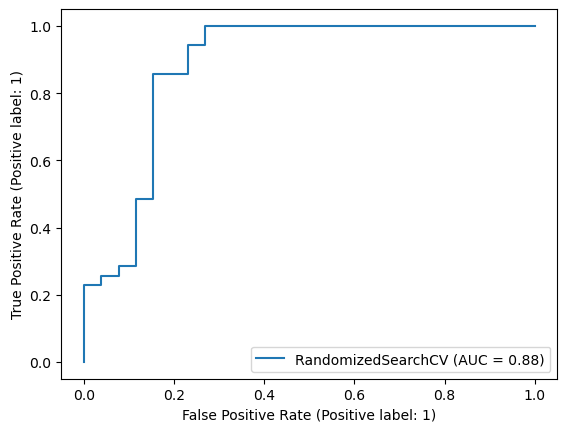

In [66]:
plot_roc_curve(cv_lr, x_test, y_test)

In [67]:
lr_confusion_mat = confusion_matrix(y_test,y_pred)

In [68]:
lr_confusion_mat

array([[20,  6],
       [ 2, 33]])

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.85      0.94      0.89        35

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [70]:
cv_lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [73]:
clf = LogisticRegression( C= 0.615848211066026, 
                          solver='liblinear')

In [113]:
cv_metrics = []
scoring = ['accuracy', 'recall','f1','precision']
for i in scoring:
    cvmetrics = cross_val_score(clf,x,y,cv=5, scoring=i)
    cvm = cvmetrics.mean()
    cv_metrics.append(cvm)
    


In [92]:
cv_metrics

[0.8249180327868852, 0.890909090909091, 0.8481221874318333, 0.8122549019607843]

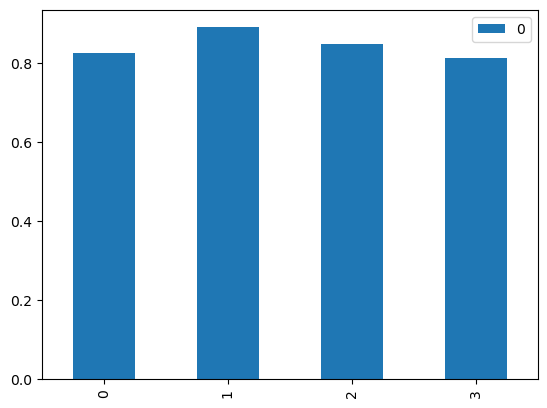

In [98]:
cv_metrics_plt = pd.DataFrame(cv_metrics).plot(kind='bar')


## feature importance

In [103]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [105]:
clf.coef_

array([[ 1.56371335e-02, -1.06155548e+00,  7.65474881e-01,
        -1.36137635e-02,  1.51003906e-04, -1.21795970e-01,
         3.23843009e-01,  2.24832163e-02, -8.19976789e-01,
        -6.38243896e-01,  4.13549433e-01, -7.98268803e-01,
        -6.89534389e-01]])

In [106]:
features = dict(zip(df.columns,list(clf.coef_[0])))

In [107]:
features

{'age': 0.01563713354730874,
 'sex': -1.0615554753170247,
 'cp': 0.7654748813699336,
 'trestbps': -0.013613763475280382,
 'chol': 0.00015100390559225166,
 'fbs': -0.12179596960203609,
 'restecg': 0.32384300894202656,
 'thalach': 0.022483216260582597,
 'exang': -0.8199767888972624,
 'oldpeak': -0.6382438962672201,
 'slope': 0.4135494332350917,
 'ca': -0.7982688033961026,
 'thal': -0.6895343891621796}

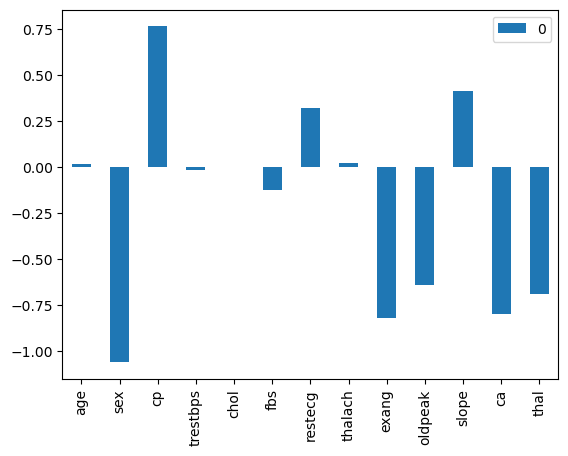

In [110]:
features_plt = pd.DataFrame(features, index=[0]).T.plot(kind='bar')